In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Carregando o vocabulário

In [2]:
import json

with open('./data/vocab.json', 'r') as infile:
    vocab = json.load(infile)

vocabSize = len(vocab['idx'])

print('Vocabulary size:', vocabSize)

Vocabulary size: 15244


### Configuração e hiperparâmetros

In [3]:
import torch
import torch.nn as nn
from data import get_loaders
from train import train, test, check_input
from matplotlib import pyplot as plt

In [4]:
classes = [
  'negative',
  'somewhat negative',
  'neutral',
  'somewhat positive',
  'positive'
]

In [5]:
def plot_instance(instance_id):
    text = train_loader.dataset.texts[instance_id]
    label = train_loader.dataset.labels[instance_id]
    label_str = classes[train_loader.dataset.labels[instance_id]]
    print('\nExample:')
    print(text)
    print('Label:', label, '-', label_str)

In [6]:
data_path = './data/'
device_name = 'cuda'
batch_size = 1024
nb_epochs = 12
log_interval = 5
lr = 1e-2
lr_step = 4
num_layers = 3
dropout=0.2

In [7]:
device = torch.device(device_name)

train_loader, valid_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['train', 'valid'],
)

nb_words = len(train_loader.dataset.vocab)

print(
    'Train size: ', 
    len(train_loader.dataset.texts),
    len(train_loader.dataset.labels)
)
print(
    'Valid size : ', 
    len(valid_loader.dataset.texts),
    len(valid_loader.dataset.labels)
)

plot_instance(0)
plot_instance(1015)
plot_instance(5136)
plot_instance(8974)


Train size:  99878 99878
Valid size :  24970 24970

Example:
a zombie
Label: 2 - neutral

Example:
the assumption
Label: 2 - neutral

Example:
hilarious and
Label: 4 - positive

Example:
good cast
Label: 3 - somewhat positive


In [8]:
def average_pooling(instances, lens):
    return torch.stack([
        text[:l].mean(0) for text, l in zip(instances, lens)
    ])


class TextLSTM(nn.Module):
    def __init__(self, num_embeddings=vocabSize, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, 
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.GRU(
            input_size=100, hidden_size=32, 
            batch_first=True, bidirectional=True,
            num_layers=num_layers, dropout=dropout
        )
        self.fc1 = nn.Linear(32*2, 32*2)
        self.fc2 = nn.Linear(32*2, len(classes))
        
    def forward(self, x, lengths):
        # Transforma índices das palavras em vetores 
        x = self.embedding(x)
        # Processa vetores das palavras com uma rede recorrente
        hidden, output = self.rnn(x)
        # Faz a média das ativações de todas as iterações recorrentes
        vector = average_pooling(hidden, lengths)
        # Camada linear para classificacao
        x = self.fc1(vector)
        x = self.fc2(x)
        return x


In [9]:
model = TextLSTM()
model = model.to(device)

dummy_pred = check_input(model, device)

Passed


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_step)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Treino


* * * Training * * *
Train Epoch:   1 [     0/ 99878 (0%)]	Loss: 1.608832
Train Epoch:   1 [  5120/ 99878 (5%)]	Loss: 1.243641
Train Epoch:   1 [ 10240/ 99878 (10%)]	Loss: 1.212476
Train Epoch:   1 [ 15360/ 99878 (15%)]	Loss: 1.198161
Train Epoch:   1 [ 20480/ 99878 (20%)]	Loss: 1.188416
Train Epoch:   1 [ 25600/ 99878 (26%)]	Loss: 1.154378
Train Epoch:   1 [ 30720/ 99878 (31%)]	Loss: 1.150414
Train Epoch:   1 [ 35840/ 99878 (36%)]	Loss: 1.094577
Train Epoch:   1 [ 40960/ 99878 (41%)]	Loss: 1.117026
Train Epoch:   1 [ 46080/ 99878 (46%)]	Loss: 1.132021
Train Epoch:   1 [ 51200/ 99878 (51%)]	Loss: 1.071429
Train Epoch:   1 [ 56320/ 99878 (56%)]	Loss: 1.057172
Train Epoch:   1 [ 61440/ 99878 (61%)]	Loss: 1.007450
Train Epoch:   1 [ 66560/ 99878 (66%)]	Loss: 1.019581
Train Epoch:   1 [ 71680/ 99878 (71%)]	Loss: 0.999360
Train Epoch:   1 [ 76800/ 99878 (77%)]	Loss: 0.993795
Train Epoch:   1 [ 81920/ 99878 (82%)]	Loss: 0.970713
Train Epoch:   1 [ 87040/ 99878 (87%)]	Loss: 1.007598
Train Ep

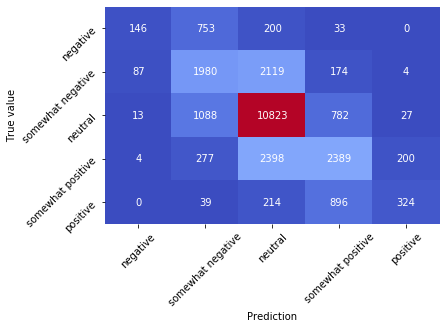


* * * Training * * *
Train Epoch:   2 [     0/ 99878 (0%)]	Loss: 0.856067
Train Epoch:   2 [  5120/ 99878 (5%)]	Loss: 0.866744
Train Epoch:   2 [ 10240/ 99878 (10%)]	Loss: 0.844532
Train Epoch:   2 [ 15360/ 99878 (15%)]	Loss: 0.842954
Train Epoch:   2 [ 20480/ 99878 (20%)]	Loss: 0.821845
Train Epoch:   2 [ 25600/ 99878 (26%)]	Loss: 0.844777
Train Epoch:   2 [ 30720/ 99878 (31%)]	Loss: 0.865798
Train Epoch:   2 [ 35840/ 99878 (36%)]	Loss: 0.854999
Train Epoch:   2 [ 40960/ 99878 (41%)]	Loss: 0.790523
Train Epoch:   2 [ 46080/ 99878 (46%)]	Loss: 0.871752
Train Epoch:   2 [ 51200/ 99878 (51%)]	Loss: 0.841232
Train Epoch:   2 [ 56320/ 99878 (56%)]	Loss: 0.819526
Train Epoch:   2 [ 61440/ 99878 (61%)]	Loss: 0.864435
Train Epoch:   2 [ 66560/ 99878 (66%)]	Loss: 0.851222
Train Epoch:   2 [ 71680/ 99878 (71%)]	Loss: 0.850875
Train Epoch:   2 [ 76800/ 99878 (77%)]	Loss: 0.834224
Train Epoch:   2 [ 81920/ 99878 (82%)]	Loss: 0.883725
Train Epoch:   2 [ 87040/ 99878 (87%)]	Loss: 0.799501
Train Ep

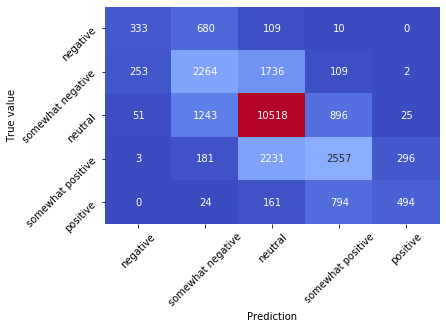


* * * Training * * *
Train Epoch:   3 [     0/ 99878 (0%)]	Loss: 0.675976
Train Epoch:   3 [  5120/ 99878 (5%)]	Loss: 0.671144
Train Epoch:   3 [ 10240/ 99878 (10%)]	Loss: 0.719606
Train Epoch:   3 [ 15360/ 99878 (15%)]	Loss: 0.714702
Train Epoch:   3 [ 20480/ 99878 (20%)]	Loss: 0.740376
Train Epoch:   3 [ 25600/ 99878 (26%)]	Loss: 0.715518
Train Epoch:   3 [ 30720/ 99878 (31%)]	Loss: 0.754498
Train Epoch:   3 [ 35840/ 99878 (36%)]	Loss: 0.740042
Train Epoch:   3 [ 40960/ 99878 (41%)]	Loss: 0.757573
Train Epoch:   3 [ 46080/ 99878 (46%)]	Loss: 0.758254
Train Epoch:   3 [ 51200/ 99878 (51%)]	Loss: 0.734845
Train Epoch:   3 [ 56320/ 99878 (56%)]	Loss: 0.737413
Train Epoch:   3 [ 61440/ 99878 (61%)]	Loss: 0.784940
Train Epoch:   3 [ 66560/ 99878 (66%)]	Loss: 0.772954
Train Epoch:   3 [ 71680/ 99878 (71%)]	Loss: 0.725567
Train Epoch:   3 [ 76800/ 99878 (77%)]	Loss: 0.735799
Train Epoch:   3 [ 81920/ 99878 (82%)]	Loss: 0.761331
Train Epoch:   3 [ 87040/ 99878 (87%)]	Loss: 0.746300
Train Ep

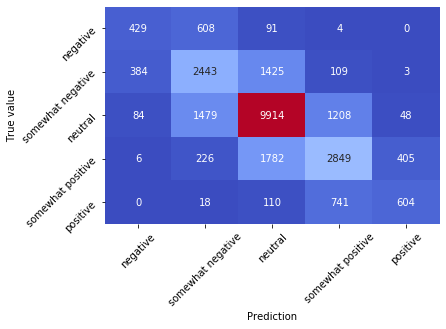


* * * Training * * *
Train Epoch:   4 [     0/ 99878 (0%)]	Loss: 0.620389
Train Epoch:   4 [  5120/ 99878 (5%)]	Loss: 0.632657
Train Epoch:   4 [ 10240/ 99878 (10%)]	Loss: 0.649250
Train Epoch:   4 [ 15360/ 99878 (15%)]	Loss: 0.699108
Train Epoch:   4 [ 20480/ 99878 (20%)]	Loss: 0.615758
Train Epoch:   4 [ 25600/ 99878 (26%)]	Loss: 0.687536
Train Epoch:   4 [ 30720/ 99878 (31%)]	Loss: 0.711622
Train Epoch:   4 [ 35840/ 99878 (36%)]	Loss: 0.697920
Train Epoch:   4 [ 40960/ 99878 (41%)]	Loss: 0.702968
Train Epoch:   4 [ 46080/ 99878 (46%)]	Loss: 0.655619
Train Epoch:   4 [ 51200/ 99878 (51%)]	Loss: 0.704154
Train Epoch:   4 [ 56320/ 99878 (56%)]	Loss: 0.676992
Train Epoch:   4 [ 61440/ 99878 (61%)]	Loss: 0.694912
Train Epoch:   4 [ 66560/ 99878 (66%)]	Loss: 0.716229
Train Epoch:   4 [ 71680/ 99878 (71%)]	Loss: 0.725545
Train Epoch:   4 [ 76800/ 99878 (77%)]	Loss: 0.692948
Train Epoch:   4 [ 81920/ 99878 (82%)]	Loss: 0.692713
Train Epoch:   4 [ 87040/ 99878 (87%)]	Loss: 0.653090
Train Ep

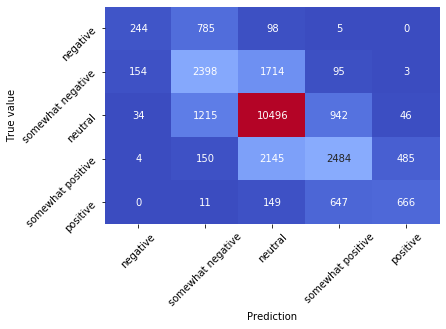


* * * Training * * *
Train Epoch:   5 [     0/ 99878 (0%)]	Loss: 0.619214
Train Epoch:   5 [  5120/ 99878 (5%)]	Loss: 0.591431
Train Epoch:   5 [ 10240/ 99878 (10%)]	Loss: 0.598615
Train Epoch:   5 [ 15360/ 99878 (15%)]	Loss: 0.547529
Train Epoch:   5 [ 20480/ 99878 (20%)]	Loss: 0.616594
Train Epoch:   5 [ 25600/ 99878 (26%)]	Loss: 0.576792
Train Epoch:   5 [ 30720/ 99878 (31%)]	Loss: 0.596471
Train Epoch:   5 [ 35840/ 99878 (36%)]	Loss: 0.533220
Train Epoch:   5 [ 40960/ 99878 (41%)]	Loss: 0.585458
Train Epoch:   5 [ 46080/ 99878 (46%)]	Loss: 0.561388
Train Epoch:   5 [ 51200/ 99878 (51%)]	Loss: 0.563859
Train Epoch:   5 [ 56320/ 99878 (56%)]	Loss: 0.534311
Train Epoch:   5 [ 61440/ 99878 (61%)]	Loss: 0.577119
Train Epoch:   5 [ 66560/ 99878 (66%)]	Loss: 0.533373
Train Epoch:   5 [ 71680/ 99878 (71%)]	Loss: 0.539870
Train Epoch:   5 [ 76800/ 99878 (77%)]	Loss: 0.621656
Train Epoch:   5 [ 81920/ 99878 (82%)]	Loss: 0.559406
Train Epoch:   5 [ 87040/ 99878 (87%)]	Loss: 0.543766
Train Ep

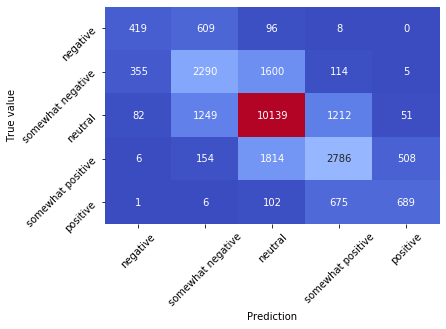


* * * Training * * *
Train Epoch:   6 [     0/ 99878 (0%)]	Loss: 0.540644
Train Epoch:   6 [  5120/ 99878 (5%)]	Loss: 0.555318
Train Epoch:   6 [ 10240/ 99878 (10%)]	Loss: 0.535655
Train Epoch:   6 [ 15360/ 99878 (15%)]	Loss: 0.535878
Train Epoch:   6 [ 20480/ 99878 (20%)]	Loss: 0.507485
Train Epoch:   6 [ 25600/ 99878 (26%)]	Loss: 0.504348
Train Epoch:   6 [ 30720/ 99878 (31%)]	Loss: 0.550813
Train Epoch:   6 [ 35840/ 99878 (36%)]	Loss: 0.535370
Train Epoch:   6 [ 40960/ 99878 (41%)]	Loss: 0.521033
Train Epoch:   6 [ 46080/ 99878 (46%)]	Loss: 0.553236
Train Epoch:   6 [ 51200/ 99878 (51%)]	Loss: 0.541512
Train Epoch:   6 [ 56320/ 99878 (56%)]	Loss: 0.520773
Train Epoch:   6 [ 61440/ 99878 (61%)]	Loss: 0.613122
Train Epoch:   6 [ 66560/ 99878 (66%)]	Loss: 0.565267
Train Epoch:   6 [ 71680/ 99878 (71%)]	Loss: 0.540168
Train Epoch:   6 [ 76800/ 99878 (77%)]	Loss: 0.515455
Train Epoch:   6 [ 81920/ 99878 (82%)]	Loss: 0.562561
Train Epoch:   6 [ 87040/ 99878 (87%)]	Loss: 0.558568
Train Ep

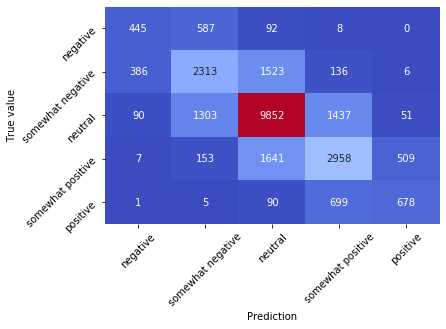


* * * Training * * *
Train Epoch:   7 [     0/ 99878 (0%)]	Loss: 0.540634
Train Epoch:   7 [  5120/ 99878 (5%)]	Loss: 0.492977
Train Epoch:   7 [ 10240/ 99878 (10%)]	Loss: 0.551775
Train Epoch:   7 [ 15360/ 99878 (15%)]	Loss: 0.529095
Train Epoch:   7 [ 20480/ 99878 (20%)]	Loss: 0.550654
Train Epoch:   7 [ 25600/ 99878 (26%)]	Loss: 0.532232
Train Epoch:   7 [ 30720/ 99878 (31%)]	Loss: 0.516766
Train Epoch:   7 [ 35840/ 99878 (36%)]	Loss: 0.510715
Train Epoch:   7 [ 40960/ 99878 (41%)]	Loss: 0.553648
Train Epoch:   7 [ 46080/ 99878 (46%)]	Loss: 0.513473
Train Epoch:   7 [ 51200/ 99878 (51%)]	Loss: 0.543954
Train Epoch:   7 [ 56320/ 99878 (56%)]	Loss: 0.566032
Train Epoch:   7 [ 61440/ 99878 (61%)]	Loss: 0.558205
Train Epoch:   7 [ 66560/ 99878 (66%)]	Loss: 0.594409
Train Epoch:   7 [ 71680/ 99878 (71%)]	Loss: 0.531546
Train Epoch:   7 [ 76800/ 99878 (77%)]	Loss: 0.498807
Train Epoch:   7 [ 81920/ 99878 (82%)]	Loss: 0.566312
Train Epoch:   7 [ 87040/ 99878 (87%)]	Loss: 0.533063
Train Ep

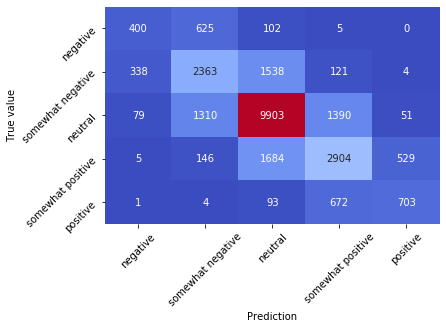


* * * Training * * *
Train Epoch:   8 [     0/ 99878 (0%)]	Loss: 0.478750
Train Epoch:   8 [  5120/ 99878 (5%)]	Loss: 0.555883
Train Epoch:   8 [ 10240/ 99878 (10%)]	Loss: 0.512358
Train Epoch:   8 [ 15360/ 99878 (15%)]	Loss: 0.495790
Train Epoch:   8 [ 20480/ 99878 (20%)]	Loss: 0.520451
Train Epoch:   8 [ 25600/ 99878 (26%)]	Loss: 0.500661
Train Epoch:   8 [ 30720/ 99878 (31%)]	Loss: 0.517967
Train Epoch:   8 [ 35840/ 99878 (36%)]	Loss: 0.519969
Train Epoch:   8 [ 40960/ 99878 (41%)]	Loss: 0.513980
Train Epoch:   8 [ 46080/ 99878 (46%)]	Loss: 0.479435
Train Epoch:   8 [ 51200/ 99878 (51%)]	Loss: 0.492407
Train Epoch:   8 [ 56320/ 99878 (56%)]	Loss: 0.531458
Train Epoch:   8 [ 61440/ 99878 (61%)]	Loss: 0.501831
Train Epoch:   8 [ 66560/ 99878 (66%)]	Loss: 0.500263
Train Epoch:   8 [ 71680/ 99878 (71%)]	Loss: 0.547134
Train Epoch:   8 [ 76800/ 99878 (77%)]	Loss: 0.550266
Train Epoch:   8 [ 81920/ 99878 (82%)]	Loss: 0.546298
Train Epoch:   8 [ 87040/ 99878 (87%)]	Loss: 0.559382
Train Ep

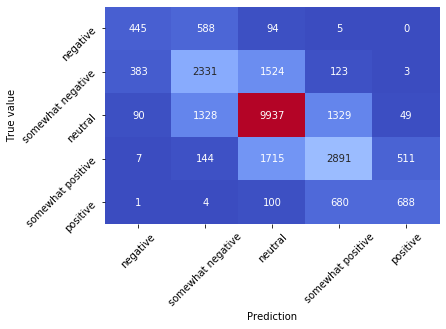


* * * Training * * *
Train Epoch:   9 [     0/ 99878 (0%)]	Loss: 0.504349
Train Epoch:   9 [  5120/ 99878 (5%)]	Loss: 0.481556
Train Epoch:   9 [ 10240/ 99878 (10%)]	Loss: 0.479816
Train Epoch:   9 [ 15360/ 99878 (15%)]	Loss: 0.519677
Train Epoch:   9 [ 20480/ 99878 (20%)]	Loss: 0.515832
Train Epoch:   9 [ 25600/ 99878 (26%)]	Loss: 0.507182
Train Epoch:   9 [ 30720/ 99878 (31%)]	Loss: 0.495345
Train Epoch:   9 [ 35840/ 99878 (36%)]	Loss: 0.459253
Train Epoch:   9 [ 40960/ 99878 (41%)]	Loss: 0.492519
Train Epoch:   9 [ 46080/ 99878 (46%)]	Loss: 0.517825
Train Epoch:   9 [ 51200/ 99878 (51%)]	Loss: 0.453911
Train Epoch:   9 [ 56320/ 99878 (56%)]	Loss: 0.483087
Train Epoch:   9 [ 61440/ 99878 (61%)]	Loss: 0.483009
Train Epoch:   9 [ 66560/ 99878 (66%)]	Loss: 0.490168
Train Epoch:   9 [ 71680/ 99878 (71%)]	Loss: 0.455920
Train Epoch:   9 [ 76800/ 99878 (77%)]	Loss: 0.478027
Train Epoch:   9 [ 81920/ 99878 (82%)]	Loss: 0.532414
Train Epoch:   9 [ 87040/ 99878 (87%)]	Loss: 0.519257
Train Ep

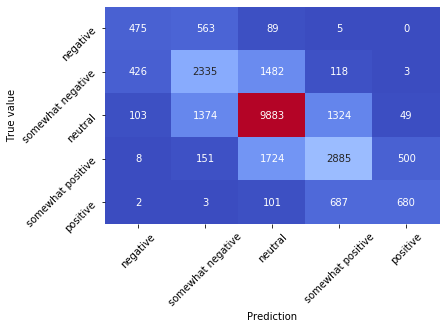


* * * Training * * *
Train Epoch:  10 [     0/ 99878 (0%)]	Loss: 0.495311
Train Epoch:  10 [  5120/ 99878 (5%)]	Loss: 0.474535
Train Epoch:  10 [ 10240/ 99878 (10%)]	Loss: 0.489373
Train Epoch:  10 [ 15360/ 99878 (15%)]	Loss: 0.485583
Train Epoch:  10 [ 20480/ 99878 (20%)]	Loss: 0.499238
Train Epoch:  10 [ 25600/ 99878 (26%)]	Loss: 0.499755
Train Epoch:  10 [ 30720/ 99878 (31%)]	Loss: 0.519896
Train Epoch:  10 [ 35840/ 99878 (36%)]	Loss: 0.487016
Train Epoch:  10 [ 40960/ 99878 (41%)]	Loss: 0.474349
Train Epoch:  10 [ 46080/ 99878 (46%)]	Loss: 0.471084
Train Epoch:  10 [ 51200/ 99878 (51%)]	Loss: 0.497236
Train Epoch:  10 [ 56320/ 99878 (56%)]	Loss: 0.510173
Train Epoch:  10 [ 61440/ 99878 (61%)]	Loss: 0.513447
Train Epoch:  10 [ 66560/ 99878 (66%)]	Loss: 0.453344
Train Epoch:  10 [ 71680/ 99878 (71%)]	Loss: 0.524541
Train Epoch:  10 [ 76800/ 99878 (77%)]	Loss: 0.508325
Train Epoch:  10 [ 81920/ 99878 (82%)]	Loss: 0.537695
Train Epoch:  10 [ 87040/ 99878 (87%)]	Loss: 0.491577
Train Ep

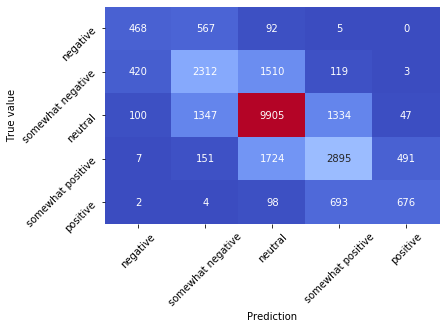


* * * Training * * *
Train Epoch:  11 [     0/ 99878 (0%)]	Loss: 0.493532
Train Epoch:  11 [  5120/ 99878 (5%)]	Loss: 0.500624
Train Epoch:  11 [ 10240/ 99878 (10%)]	Loss: 0.500835
Train Epoch:  11 [ 15360/ 99878 (15%)]	Loss: 0.495398
Train Epoch:  11 [ 20480/ 99878 (20%)]	Loss: 0.506473
Train Epoch:  11 [ 25600/ 99878 (26%)]	Loss: 0.470788
Train Epoch:  11 [ 30720/ 99878 (31%)]	Loss: 0.481688
Train Epoch:  11 [ 35840/ 99878 (36%)]	Loss: 0.456611
Train Epoch:  11 [ 40960/ 99878 (41%)]	Loss: 0.479403
Train Epoch:  11 [ 46080/ 99878 (46%)]	Loss: 0.471890
Train Epoch:  11 [ 51200/ 99878 (51%)]	Loss: 0.459941
Train Epoch:  11 [ 56320/ 99878 (56%)]	Loss: 0.474263
Train Epoch:  11 [ 61440/ 99878 (61%)]	Loss: 0.491449
Train Epoch:  11 [ 66560/ 99878 (66%)]	Loss: 0.476383
Train Epoch:  11 [ 71680/ 99878 (71%)]	Loss: 0.510734
Train Epoch:  11 [ 76800/ 99878 (77%)]	Loss: 0.462392
Train Epoch:  11 [ 81920/ 99878 (82%)]	Loss: 0.515580
Train Epoch:  11 [ 87040/ 99878 (87%)]	Loss: 0.454125
Train Ep

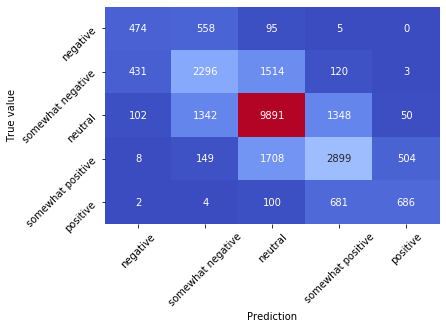


* * * Training * * *
Train Epoch:  12 [     0/ 99878 (0%)]	Loss: 0.433791
Train Epoch:  12 [  5120/ 99878 (5%)]	Loss: 0.450538
Train Epoch:  12 [ 10240/ 99878 (10%)]	Loss: 0.476693
Train Epoch:  12 [ 15360/ 99878 (15%)]	Loss: 0.490323
Train Epoch:  12 [ 20480/ 99878 (20%)]	Loss: 0.460115
Train Epoch:  12 [ 25600/ 99878 (26%)]	Loss: 0.502899
Train Epoch:  12 [ 30720/ 99878 (31%)]	Loss: 0.525206
Train Epoch:  12 [ 35840/ 99878 (36%)]	Loss: 0.520154
Train Epoch:  12 [ 40960/ 99878 (41%)]	Loss: 0.456669
Train Epoch:  12 [ 46080/ 99878 (46%)]	Loss: 0.492264
Train Epoch:  12 [ 51200/ 99878 (51%)]	Loss: 0.519059
Train Epoch:  12 [ 56320/ 99878 (56%)]	Loss: 0.506225
Train Epoch:  12 [ 61440/ 99878 (61%)]	Loss: 0.446557
Train Epoch:  12 [ 66560/ 99878 (66%)]	Loss: 0.518291
Train Epoch:  12 [ 71680/ 99878 (71%)]	Loss: 0.489540
Train Epoch:  12 [ 76800/ 99878 (77%)]	Loss: 0.482194
Train Epoch:  12 [ 81920/ 99878 (82%)]	Loss: 0.481084
Train Epoch:  12 [ 87040/ 99878 (87%)]	Loss: 0.491763
Train Ep

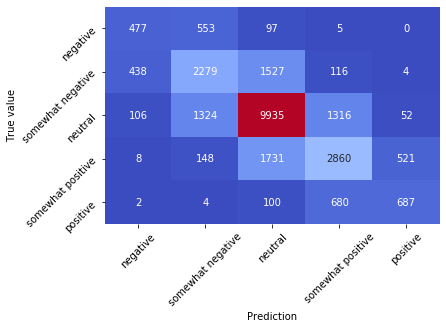

In [12]:
history = train(
    model=model, train_loader=train_loader, test_loader=valid_loader, classes=classes,
    device=device, optimizer=optimizer, lr_scheduler=lr_scheduler,
    nb_epochs=nb_epochs, log_interval=log_interval
)

### Resultados do treino

In [13]:
print('Max val acc: {:.2f}%'.format(max(history['val_acc'])))

Max val acc: 65.37%


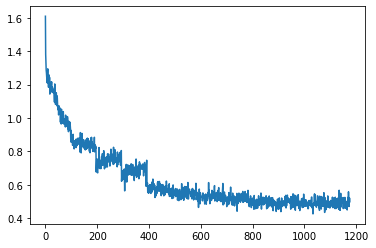

In [14]:
plt.plot(history['train_loss'])
plt.show()

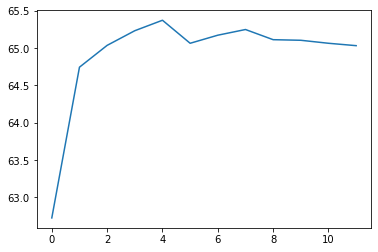

In [15]:
plt.plot(history['val_acc'])
plt.show()